In [1]:
%matplotlib inline

import sys
import os
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
from matplotlib import pyplot as plt, animation, rc,colors
from datetime import datetime, timedelta
from cartopy import crs, feature
import cmocean
import yaml

from IPython.display import Image
rc('animation', html='html5')

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

fatal: not a git repository (or any parent up to mount point /)
Stopping at filesystem boundary (GIT_DISCOVERY_ACROSS_FILESYSTEM not set).


In [2]:
def time_prob(x0,k):
    tmin = (x0**2/(4*k))/86400
    tmax = ((((x0+(285*k))/0.4)**2)/(np.pi*k))//86400
    return tmin,tmax

In [3]:
def get_WW3_path(date):
    """Construct WW3 results path given the date
    e.g., /opp/wwatch3/nowcast/SoG_ww3_fields_YYYYMMDD_YYYYMMDD.nc
    :arg date: date of WW3 record
    :type date: :py:class:`datetime.datetime`
    :returns: WW3 path
    :rtype: str
    """
    # Make WW3 path
    path = '/opp/wwatch3/hindcast'
    datestr = [date.strftime(fmt) for fmt in ('%d%b%y', '%Y%m%d_%Y%m%d')]
    path = os.path.join(path, datestr[0].lower(), f'SoG_ww3_fields_{datestr[1]}.nc')
    if not os.path.exists(path):
        raise ValueError(f"No WW3 record found for the specified date {date.strftime('%Y-%b-%d')}")

    return path

In [4]:
# Define paths
local = 0 #Set to 0 when working on server
paths = path(local)
coords = xr.open_dataset(paths['coords'], decode_times=False)
mask = xr.open_dataset(paths['mask'])

In [5]:
# wcc = xr.open_dataset(get_WW3_path(datetime(2018,12,20))).wcc

# fig,ax = plt.subplots(1,1,figsize=(19, 8))
# #ax = plt.axes(xlim=(-127,-121),ylim=(46.8,51.2))
# cc = ax.contourf(wcc.longitude, wcc.latitude, wcc[0,:,:],cmap=cmocean.cm.thermal,linewidths=0.1)
# plt.colorbar(cc)
# #ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='#f0f0f5')
# #ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')

In [6]:
# config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach.yaml'
# param = load_config1(config)
# start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
# Tmax = param['param']['length'] # Set Time length [days] 
# duration = timedelta(days=Tmax)
# dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
# N = param['param']['N'] # number of deploying locations
# n = param['param']['n'] # 1000   # number of particles per location
# dmin = param['param']['dmin'] #minimum depth
# dd = param['param']['dd'] #max depth difference from dmin
# name = param['file']['name'] #name output file

# daterange = [start+timedelta(days=i) for i in range(Tmax)]
# fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
# outfile = os.path.join(paths['out'], fn)

# config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach2.yaml'
# param = load_config1(config)
# start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
# Tmax = param['param']['length'] # Set Time length [days] 
# duration = timedelta(days=Tmax)
# name = param['file']['name'] #name output file
# fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
# outfile2 = os.path.join(paths['out'], fn)

# config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach3.yaml'
# param = load_config1(config)
# start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
# Tmax = param['param']['length'] # Set Time length [days] 
# duration = timedelta(days=Tmax)
# name = param['file']['name'] #name output file
# fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
# outfile3 = os.path.join(paths['out'], fn)

# config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach4.yaml'
# param = load_config1(config)
# start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
# Tmax = param['param']['length'] # Set Time length [days] 
# duration = timedelta(days=Tmax)
# name = param['file']['name'] #name output file
# fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
# outfile4 = os.path.join(paths['out'], fn)

# config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach5.yaml'
# param = load_config1(config)
# start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
# Tmax = param['param']['length'] # Set Time length [days] 
# duration = timedelta(days=Tmax)
# name = param['file']['name'] #name output file
# fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
# outfile5 = os.path.join(paths['out'], fn)


#ds = xr.open_dataset(outfile)
# ds2 = xr.open_dataset(outfile2)
# ds3 = xr.open_dataset(outfile3)
# ds4 = xr.open_dataset(outfile4)
# ds5 = xr.open_dataset(outfile5)


In [10]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/beaching/Grounding winter/Beach2.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

ds = xr.open_dataset(outfile)

In [10]:
config='/home/jvalenti/MOAD/analysis-jose/OParcels/Beach2016.yaml'
param = load_config1(config)
start = datetime(param['startdate']['year'], param['startdate']['month'], param['startdate']['day']) #Start date
Tmax = param['param']['length'] # Set Time length [days] 
duration = timedelta(days=Tmax)
dt = param['param']['dt'] #toggle between - or + to pick backwards or forwards 
N = param['param']['N'] # number of deploying locations
n = param['param']['n'] # 1000   # number of particles per location
dmin = param['param']['dmin'] #minimum depth
dd = param['param']['dd'] #max depth difference from dmin
name = param['file']['name'] #name output file

daterange = [start+timedelta(days=i) for i in range(Tmax)]
fn =  name + '_'.join(d.strftime('%Y%m%d')+'_1n' for d in [start, start+duration]) + '.nc'
outfile = os.path.join(paths['out'], fn)

ds = xr.open_dataset(outfile)
time = ds.time[:49000,0:720]
beached = ds.beached[:49000,0:720]

time = np.array(time,dtype='datetime64')

timeg = []
origin = []
for i in range(beached.shape[0]):
    index = beached[i,:].argmax()
    timeg.append(time[i,index])
    origin.append(time[i,0])
timeg2 = []
#for t in timeg:
#    timeg2.append(t.values)

d = {"DeployT": origin, "Timeg": timeg}
df = pd.DataFrame(d)
df.to_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/timeg_2016d.csv')

In [ ]:
# a=ds.to_dataframe()
# a2=ds2.to_dataframe()
# a3=ds3.to_dataframe()
# a4=ds4.to_dataframe()
# a5=ds5.to_dataframe()

In [ ]:
# obsss = np.zeros(1921)
# obsss2 = np.zeros_like(obsss)
# obsss3 = np.zeros_like(obsss)
# obsss4 = np.zeros_like(obsss)
# obsss5 = np.zeros_like(obsss)


# for i in range(12000):
#     df=a.loc[i,:]
#     df2=a2.loc[i,:]
#     df3=a3.loc[i,:]
#     df4=a4.loc[i,:]
#     df5=a5.loc[i,:] 
#     obsss[df[df.beached!=0].first_valid_index()]+=1
#     obsss2[df2[df2.beached!=0].first_valid_index()]+=1
#     obsss3[df3[df3.beached!=0].first_valid_index()]+=1
#     obsss4[df4[df4.beached!=0].first_valid_index()]+=1
#     obsss5[df5[df5.beached!=0].first_valid_index()]+=1

# d = {"b1": obsss, "b2": obsss2,"b3":obsss3,"b4":obsss4,"b5":obsss5}
# df = pd.DataFrame(d)
# df.to_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/nostokes.csv')
  

In [ ]:
winter=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/winter.csv')
winter1=winter.b1
winter2=winter.b2
winter3=winter.b3
winter4=winter.b4
winter5=winter.b5

In [ ]:
winter1 = winter1-1263
winter2 = winter2-1175
winter3 = winter3-953
winter4 = winter4-1360
winter5 = winter5-903

In [ ]:
nostokes=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/nostokes.csv')
nostokes1=nostokes.b1
nostokes2=nostokes.b2
nostokes3=nostokes.b3
nostokes4=nostokes.b4
nostokes5=nostokes.b5

In [ ]:
nostokes1=nostokes1 - 570
nostokes2=nostokes2 - 513
nostokes3=nostokes3 - 457
nostokes4=nostokes4 - 618
nostokes5=nostokes5 - 415

In [ ]:
obss=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/obsss.csv')
obsss=obss.b1
obsss2=obss.b2
obsss3=obss.b3
obsss4=obss.b4
obsss5=obss.b5

In [ ]:
obsss=obsss-453
obsss2 = obsss2-417
obsss3 = obsss3-392
obsss4 = obsss4-466
obsss5 =obsss5-366

In [ ]:
y16=pd.read_csv('/home/jvalenti/MOAD/analysis-jose/OParcels/year2016.csv')
y16s=y16.b1
y16s +=-4667.0

Text(0, 0.5, 'Number of particles grounded after t')

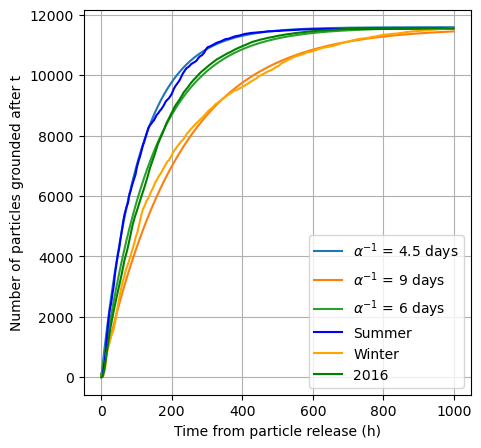

In [ ]:
time2 = np.linspace(0,24*41.66,1000)

b = []
b2 = []
b3 = []
b4 = []


for i in range(1000):
    b.append(np.sum(obsss[0:i]))
    b2.append(np.sum(nostokes1[0:i]))
    b3.append(np.sum(winter1[0:i])*1.0876)
    b4.append(np.sum(y16s[0:i])*0.24393)
    

alpha = 1/(4.5*24) 

alphaw = 1/(9*24) 
alphaM = 1/(5.9*24)
alpham = 1/(0.1*24)
alphay = 1/(6*24)
pw = b3[-1]* alphaw * (np.exp(-alphaw*time2))
p = b[-1]* alpha * (np.exp(-alpha*time2))
p2 = b[-1]* alphaM * (np.exp(-alphaM*time2))
p3 = b[-1]* alpham * (np.exp(-alpham*time2))
py = b4[-1]* alphay * (np.exp(-alphay*time2))
pn =[p[0]]
pn2 =[p3[0]]
pn3 =[p2[0]]
pny =[py[0]]
pnw =[pw[0]]
for i in range(1,len(time2)):
    pnw.append(np.sum(pw[:i]))
    pn.append(np.sum(p[:i]))
    pn2.append(np.sum(p2[:i]))
    pn3.append(np.sum(p3[:i]))
    pny.append(np.sum(py[:i]))
fig,ax=plt.subplots(1,1,figsize=(5,5))
plt.plot(pn,label=r'$\alpha^{-1}$ = 4.5 days' )
plt.plot(pnw,label=r'$\alpha^{-1}$ = 9 days' )
plt.plot(pny,label=r'$\alpha^{-1}$ = 6 days' )
plt.plot(b,label='Summer',c='b')
plt.plot(b3,label='Winter',c='orange')
#plt.plot(b2,label='Kh = 1.5 without stokes drift')
plt.plot(b4,label='2016',c='g')

plt.legend(loc = 4)
plt.grid()
plt.xlabel('Time from particle release (h)')
plt.ylabel('Number of particles grounded after t')

In [ ]:
# time2 = np.linspace(0,24*41.66,1000)

# b = []
# b2 = []
# b3 = []


# for i in range(1000):
#     b.append(np.sum(obsss[0:i]))
#     b2.append(np.sum(nostokes1[0:i]))
#     b3.append(np.sum(winter1[0:i]))
    

# alpha = 1/(4.5*24) 

# alphaw = 1/(9*24) 
# alphaM = 1/(5.9*24)
# alpham = 1/(0.1*24)
# pw = b3[-1]* alphaw * (np.exp(-alphaw*time2))
# p = b[-1]* alpha * (np.exp(-alpha*time2))
# p2 = b[-1]* alphaM * (np.exp(-alphaM*time2))
# p3 = b[-1]* alpham * (np.exp(-alpham*time2))
# pn =[p[0]]
# pn2 =[p3[0]]
# pn3 =[p2[0]]
# pnw =[pw[0]]
# for i in range(1,len(time2)):
#     pnw.append(np.sum(pw[:i]))
#     pn.append(np.sum(p[:i]))
#     pn2.append(np.sum(p2[:i]))
#     pn3.append(np.sum(p3[:i]))
# fig,ax=plt.subplots(1,1,figsize=(5,5))
# plt.plot(pn,label=r'Exponential PDF $\alpha^{-1}$ = 4.5 days' )
# plt.plot(pnw,label=r'Exponential PDF $\alpha^{-1}$ = 9 days' )
# plt.plot(b,label='Kh = 1.5')
# plt.plot(b3,label='Kh = 1.5 without stokes winter')
# plt.plot(b2,label='Kh = 1.5 without stokes drift')

# plt.legend(loc = 4)
# plt.grid()
# plt.xlabel('Time from particle release (h)')
# plt.ylabel('Number of particles grounded after t')

In [ ]:
# time2 = np.linspace(0,24*41.66,1000)

# b = []
# b2 = []
# b3 = []
# b4 = []
# b5 = []

# for i in range(1000):
#     b.append(np.sum(obsss[0:i]))
#     b2.append(np.sum(obsss2[0:i]))
#     b3.append(np.sum(obsss3[0:i]))
#     b4.append(np.sum(obsss4[0:i]))
#     b5.append(np.sum(obsss5[0:i]))

# alpha = 1/(4.5*24) 
# alphaM = 1/(5.9*24)
# alpham = 1/(0.1*24)
# p = b[-1]* alpha * (np.exp(-alpha*time2))
# p2 = b[-1]* alphaM * (np.exp(-alphaM*time2))
# p3 = b[-1]* alpham * (np.exp(-alpham*time2))
# pn =[p[0]]
# pn2 =[p3[0]]
# pn3 =[p2[0]]
# for i in range(1,len(time2)):
#     pn.append(np.sum(p[:i]))
#     pn2.append(np.sum(p2[:i]))
#     pn3.append(np.sum(p3[:i]))
# fig,ax=plt.subplots(1,1,figsize=(5,5))
# plt.plot(pn,label=r'Exponential PDF $\alpha^{-1}$ = 4.5 days' )
# plt.plot(b,label='Kh = 1.5')
# plt.plot(b2,label='Kh = 2')
# plt.plot(b3,label='Kh = 3')
# plt.plot(b4,label='Kh = 1')
# plt.plot(b5,label='Kh = 4')
# #plt.fill_between(time2, pn2, pn3,alpha = 0.2,label='stderror')
# #plt.xlim((-0.5,200))
# plt.legend(loc = 4)
# #plt.grid()
# plt.xlabel('Time from particle release (h)')
# plt.ylabel('Number of particles grounded after t')

In [ ]:
# time2 = np.linspace(0,24*41.66,1000)

# b = []
# b2 = []
# b3 = []
# b4 = []
# b5 = []

# for i in range(1000):
#     b.append(np.sum(obsss[0:i]))
#     b2.append(np.sum(obsss2[0:i]))
#     b3.append(np.sum(obsss3[0:i]))
#     b4.append(np.sum(obsss4[0:i]))
#     b5.append(np.sum(obsss5[0:i]))

# alpha = 1/(3*24) 
# alphaM = 1/(5.9*24)
# alpham = 1/(0.1*24)
# p = b4[-1]* alpha * (np.exp(-alpha*time2))
# p2 = b4[-1]* alphaM * (np.exp(-alphaM*time2))
# p3 = b4[-1]* alpham * (np.exp(-alpham*time2))
# pn =[p[0]]
# pn2 =[p3[0]]
# pn3 =[p2[0]]
# for i in range(1,len(time2)):
#     pn.append(np.sum(p[:i]))
#     pn2.append(np.sum(p2[:i]))
#     pn3.append(np.sum(p3[:i]))
# fig,ax=plt.subplots(1,1,figsize=(10,8))
# plt.plot(p)
# plt.plot(obsss,label='Kh = 1.5')
# plt.plot(obsss2,label='Kh = 2')
# plt.plot(obsss3,label='Kh = 3')
# plt.plot(obsss4,label='Kh = 1')
# plt.plot(obsss5,label='Kh = 4')
# #plt.fill_between(time2, p2, p3,alpha = 0.2,label='stderror')
# plt.plot(p,label='observations fitted exponential',c='tab:blue',linewidth=3)
# plt.ylim((-0.5,200))
# plt.xlabel('time to first grounding (h)')
# plt.ylabel('Counts')
# plt.legend(loc = 4)

In [ ]:
# beach = ds.beached
# beach2 = ds2.beached
# beach3 = ds3.beached
# beach4 = ds4.beached
# beach5 = ds5.beached
# #beach6 = ds6.beached

# b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

# for t in range(beach2.shape[1]):
#     b.append(np.count_nonzero(beach[:,t] == 1.0)) 
#     b2.append(np.count_nonzero(beach2[:,t] == 1.0))
#     b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
#     b4.append(np.count_nonzero(beach4[:,t] == 1.0))
#     b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
#     #b6.append(np.count_nonzero(beach6[:,t] == 1.0))

# d = [b[0]]
# d2 = [b2[0]]
# d3 = [b3[0]]
# d4 = [b4[0]]
# d5 = [b5[0]]
# #d6 = [b6[0]]

# for i in range(1,len(b)):
#     d.append(b[i] - (b[i-1]))
#     d2.append(b2[i] - (b2[i-1]))
#     d3.append(b3[i] - (b3[i-1]))
#     d4.append(b4[i] - (b4[i-1]))
#     d5.append(b5[i] - (b5[i-1]))
#     #d6.append(b6[i] - (b6[i-1]))

# time = np.linspace(0,24,577)
# time2 = np.linspace(0,24*24,577)
# fig,axs = plt.subplots(1,1,figsize=(10,5))
# plt.plot(time,b,label='Kh = 1.5 summer')
# plt.plot(time,b2,label='Kh = 1.5 winter')
# plt.plot(time,b3,label='Kh = 1.0 summer')
# plt.plot(time,b4,label='Kh = 2.0 summer')
# plt.plot(time,b5,label='Kh = 3.0 summer')
# #plt.plot(time,d6,label='Kh = 1.5 2019')
# #plt.axvline(x=time_prob(n,1.5)[0],linestyle='--',color='grey')
# #plt.axvline(x=time_prob(n,1.5)[1],linestyle='--',color='grey')

# alpha = 1/(3.5*24)
# p = 1000* alpha * np.exp(-alpha*time2)
# plt.plot(time,p,linewidth=4,label=r"$ \alpha$ = 3days")
# plt.xlim([0,24])
# plt.ylim([0,50])
# plt.legend()
# plt.xlabel('Days after release')
# plt.ylabel('Counts of particles beached')
# plt.title('Kh vs Grounding PDF')

In [ ]:
# beach = ds.beached
# beach2 = ds2.beached
# beach3 = ds3.beached
# beach4 = ds4.beached
# beach5 = ds5.beached
# #beach6 = ds6.beached

# b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

# for t in range(beach2.shape[1]):
#     b.append(np.count_nonzero(beach[:,t] == 1.0)) 
#     b2.append(np.count_nonzero(beach2[:,t] == 1.0))
#     b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
#     b4.append(np.count_nonzero(beach4[:,t] == 1.0))
#     b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
# #    b6.append(np.count_nonzero(beach6[:,t] == 1.0))

# dsi = [b[-1]]
# dsi.append(b2[-1])
# dsi.append(b3[-1])
# dsi.append(b4[-1])
# dsi.append(b5[-1])
# #dsi.append(b6[-1])
# mm=np.mean(dsi)

# b  = np.array(b[1:])-b[1]
# b2  = np.array(b2[1:])-b2[1]
# b3  = np.array(b3[1:])-b3[1]
# b4  = np.array(b4[1:])-b4[1]
# b5  = np.array(b5[1:])-b5[1]
# #b6  = np.array(b6[1:])-b6[1]

# d = [b[0]]
# d2 = [b2[0]]
# d3 = [b3[0]]
# d4 = [b4[0]]
# d5 = [b5[0]]
# #d6 = [b6[0]]

# time = np.linspace(0,24,576)
# time2 = np.linspace(0,24*24,576)
# fig2,ax = plt.subplots(1,1,figsize=(10,5))
# #plt.plot(time,b,label='Kh = 1.5 winter')
# #plt.plot(time,b2,label='Kh = 4.0 ')
# plt.plot(time,b3,label='Kh = 1.0 ')
# plt.plot(time,b4,label='Kh = 2.0 ')
# #plt.plot(time,b5,label='Kh = 3.0 ')
# #plt.plot(time,b6,label='Kh = 1.5 winter SS')
# #plt.axvline(x=time_prob(n,1.5)[0],linestyle='--',color='grey')
# #plt.axvline(x=time_prob(n,1.5)[1],linestyle='--',color='grey')

# alpha = 1/(3*24)
# alpha2 = 1/(4*24)
# p1 = (np.max(b))* alpha * np.exp(-alpha*time2)
# p2 = (np.max(b2))* alpha * np.exp(-alpha*time2)
# p3 = (np.max(b3))* alpha * np.exp(-alpha*time2)
# p4 = (np.max(b4))* alpha * np.exp(-alpha*time2)
# p5 = (np.max(b5))* alpha * np.exp(-alpha*time2)

# #p = (np.sum(b3[0:12]))* alpha * np.exp(-alpha*time2)
# pn1 =[p[0]]
# pn2 =[p2[0]]
# pn3 =[p3[0]]
# pn4 =[p4[0]]
# pn5 =[p5[0]]

# for i in range(1,len(time2)):
#     pn1.append(np.sum(p1[:i]))
#     pn2.append(np.sum(p2[:i]))
#     pn3.append(np.sum(p3[:i]))
#     pn4.append(np.sum(p4[:i]))
#     pn5.append(np.sum(p5[:i]))
# #plt.plot(time,pn1,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5,c='tab:blue')
# #plt.plot(time,pn2,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5,c='tab:orange')
# plt.plot(time,pn3,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5,c='tab:blue')
# plt.plot(time,pn4,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5,c='tab:orange')
# #plt.plot(time,pn5,linewidth=4,label=r"$ \alpha$ = 3days",alpha=0.5,c='tab:purple')
# #plt.plot(time,pn2,linewidth=4,label=r"$ \alpha$ = 6days",alpha=0.5)
# #plt.xlim([0,15])
# #plt.ylim([0,50])
# plt.legend()
# plt.xlabel('Days after release')
# plt.ylabel('Counts of particles beached')
# plt.title('Kh vs Grounding PDF')
# plt.grid()

In [ ]:
# beach = ds.beached
# beach2 = ds2.beached
# beach3 = ds3.beached
# beach4 = ds4.beached
# beach5 = ds5.beached
# #beach6 = ds6.beached

# b,b2,b3,b4,b5,b6 = [],[],[],[],[],[]

# for t in range(beach.shape[1]):
#     b.append(np.count_nonzero(beach[:,t] == 1.0)) 
#     b2.append(np.count_nonzero(beach2[:,t] == 1.0))
#     b3.append(np.count_nonzero(beach3[:,t] == 1.0)) 
#     b4.append(np.count_nonzero(beach4[:,t] == 1.0))
#     b5.append(np.count_nonzero(beach5[:,t] == 1.0)) 
#     #b6.append(np.count_nonzero(beach6[:,t] == 1.0))

# d = [b[1]]
# d.append(b2[1])
# d.append(b3[1])
# d.append(b4[1])
# d.append(b5[1])
# #d.append(b6[1])
# mm=np.mean(d)

# b  = np.array(b[1:])-b[1]
# b2  = np.array(b2[1:])-b2[1]
# b3  = np.array(b3[1:])-b3[1]
# b4  = np.array(b4[1:])-b4[1]
# b5  = np.array(b5[1:])-b5[1]
# #b6  = np.array(b6[1:])-b6[1]

# d = [b[0]]
# d2 = [b2[0]]
# d3 = [b3[0]]
# d4 = [b4[0]]
# d5 = [b5[0]]
# #d6 = [b6[0]]

# for i in range(1,len(b)):
#     d.append(b[i] - (b[i-1]))
#     d2.append(b2[i] - (b2[i-1]))
#     d3.append(b3[i] - (b3[i-1]))
#     d4.append(b4[i] - (b4[i-1]))
#     d5.append(b5[i] - (b5[i-1]))
#  #   d6.append(b6[i] - (b6[i-1]))

# time = np.linspace(1,25,12)
# time2 = np.linspace(0,24,24)

# fig,axs = plt.subplots(2,3,figsize=(5,8))
# axs[0,0].hist(d,bins=list(np.arange(0,24,2)),label='Kh = 1.5 summer')
# axs[0,1].hist(d2,bins=list(np.arange(0,24,2)),label='Kh = 4.0 summer')
# axs[0,2].hist(d3,bins=list(np.arange(0,24,2)),label='Kh = 1.0 summer')
# axs[1,0].hist(d4,bins=list(np.arange(0,24,2)),label='Kh = 2.0 summer')
# axs[1,1].hist(d5,bins=list(np.arange(0,24,2)),label='Kh = 3.0 summer')
# #axs[2,1].hist(d6,bins=list(np.arange(0,24,2)),label='Kh = 1.5 winter')

# alpha = 1/(3.5/2)
# p = (1000)* alpha * np.exp(-alpha*time2)
# p2 =[]
# for i in range(0,len(p),2):
#     p2.append(np.sum(p[i+1:i+2]))

# for i in range(2):
#     axs[i,0].plot(time2,p,label="Observations SoG")
#     #axs[i,0].set_xlim([-0.5,10.5])
#     axs[i,1].plot(time2,p,label="Observations SoG")
#     #axs[i,1].set_xlim([-0.5,10.5])
#     axs[i,2].plot(time2,p,label="Observations SoG")

# #plt.ylim([0,50])
# #plt.legend()
# #plt.xlabel('Days after release')
# #plt.ylabel('Counts of particles beached')
# #plt.title('Kh vs Observations')

In [11]:
def mapanimation(outfile,N,n,clon,clat,fps=1,local=1):
    '''mapanimation(outfile,N,n,clon,clat,fps=1,local=1)
    Use this function to return an animated map of the particles,
    keep local=1 when working local and = 0 when remote. 
    outfile is the name of the output file from OP
    N= number of deploying sites,n=number of particles oper location,
    clat,clon location of deploying locations.
    '''
    coords,mask,ds = output(outfile,local)
    fig = plt.figure(figsize=(19, 8))
    ax = plt.axes(xlim=(-127,-121),ylim=(46.8,51.2))
    ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='#f0f0f5',linewidths=0.1)
    ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='#f0f0f5')
    ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
    ax.grid()
    f = 1.0/np.cos(49*np.pi/180)
    plt.gca().set_aspect(f)
    plt.ylabel('Latitude',fontsize=16)
    plt.xlabel('Longitude',fontsize=16)
    #t = ax.text(0.02, 0.02, '', transform=ax.transAxes)
    #t.set_text('')
    ss = []#scatter_particles(ax, N,n, 0,0, ds.lat,ds.lon)
    sed= {0: "w", 1: "k"}

    def update(frame):
        #tstamp = ds.time[0, frame].values.astype('datetime64[s]').astype(datetime)
        #t.set_text(tstamp.strftime('%Y-%b-%d %H:%M UTC'))
        global ss
        for scat in ss:
            scat.remove()
        if frame ==0:
            dsblat = ds.lat[ds.beached[:,frame+1]==1.0,frame+1]
            dsblon = ds.lon[ds.beached[:,frame+1]==1.0,frame+1]
        else:
            dsblat = ds.lat[ds.beached[:,frame]==1.0,frame]
            dsblon = ds.lon[ds.beached[:,frame]==1.0,frame]
        ss = scatter_particles(ax, N,n, frame,frame, ds.lat,ds.lon)
        if frame==0:
            pass
        else:
            ss.append(ax.scatter(dsblon, dsblat,c='m',s=5))
        #ss.append(ax.scatter(clon,clat,c='r', marker='*', linewidths=2))
        return ss
    return animation.FuncAnimation(fig, update, frames=np.arange(0,len(ds.lon[0,:]),fps))


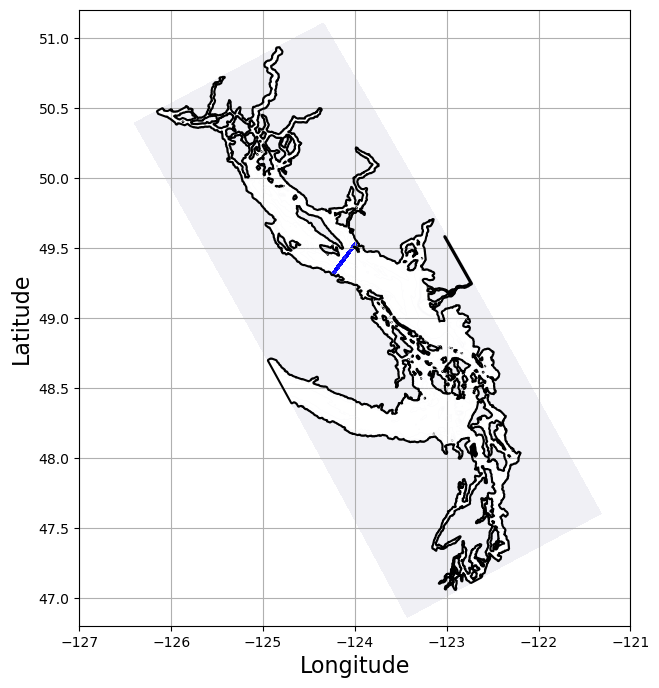

In [14]:
fps=28
anim = mapanimation(outfile,N,n,[-124.244478,-123.986083],[49.316369,49.543061],fps,local)
# f = r"/home/jvalenti/MOAD/animations/PETstokes.gif" 
f2 = r"/home/jvalenti/MOAD/animations/PETwinter.gif" 
# fy = r"/home/jvalenti/MOAD/animations/PSYear.gif" 
FFwriter = animation.FFMpegWriter()
anim.save(f2, writer = FFwriter)

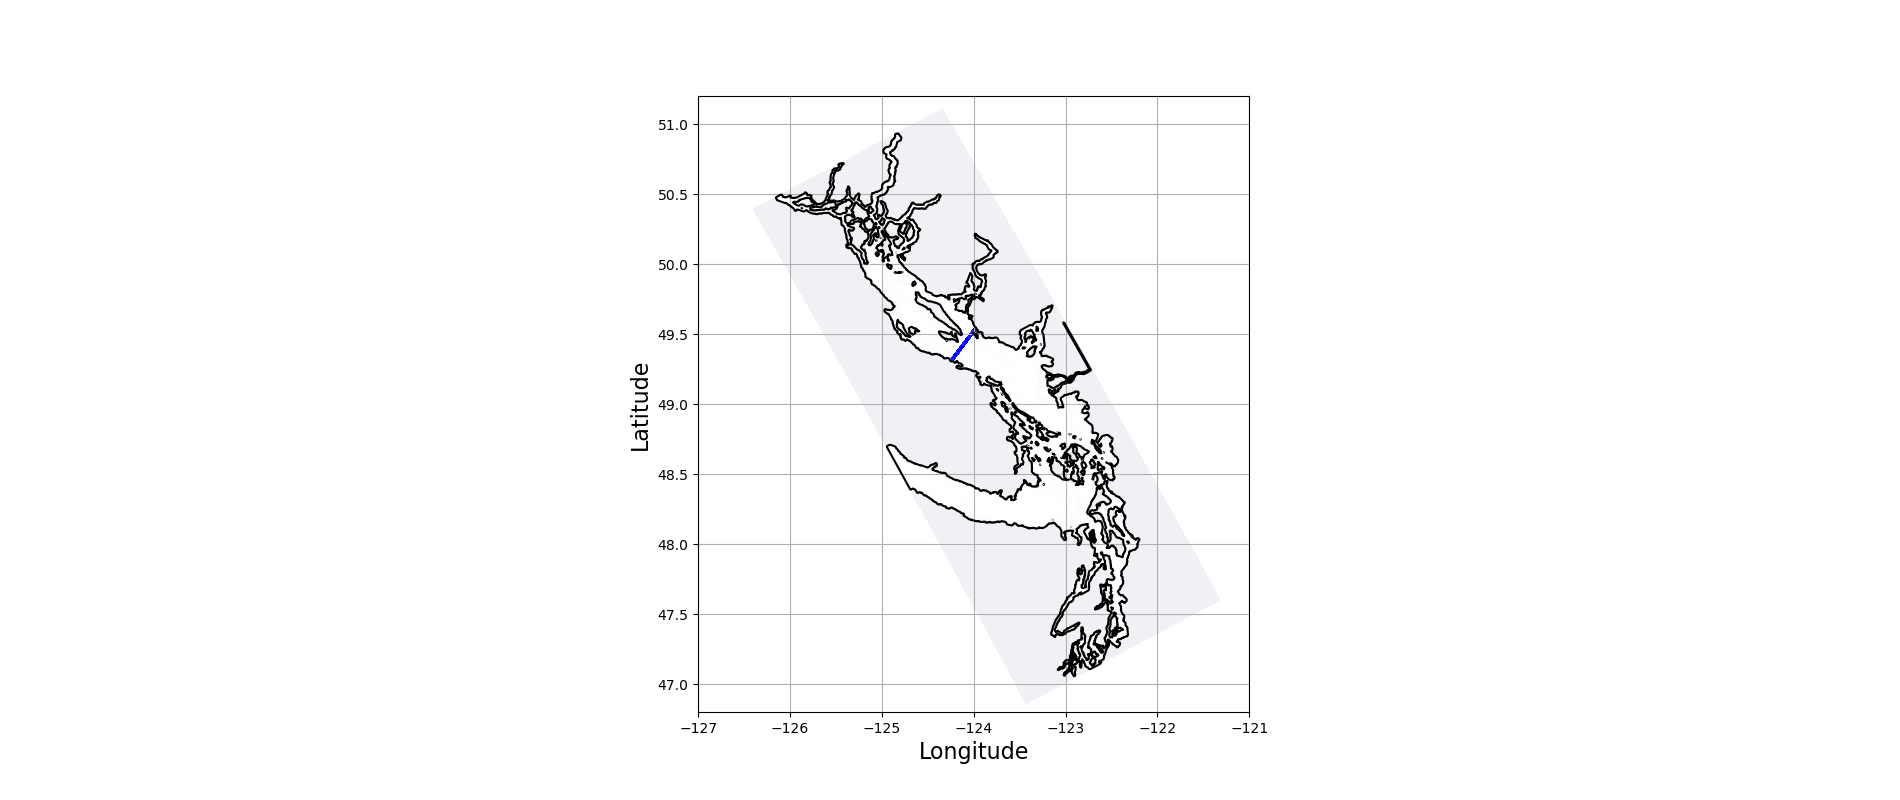

In [15]:
with open(f2,'rb') as anim:
     display(Image(anim.read()))

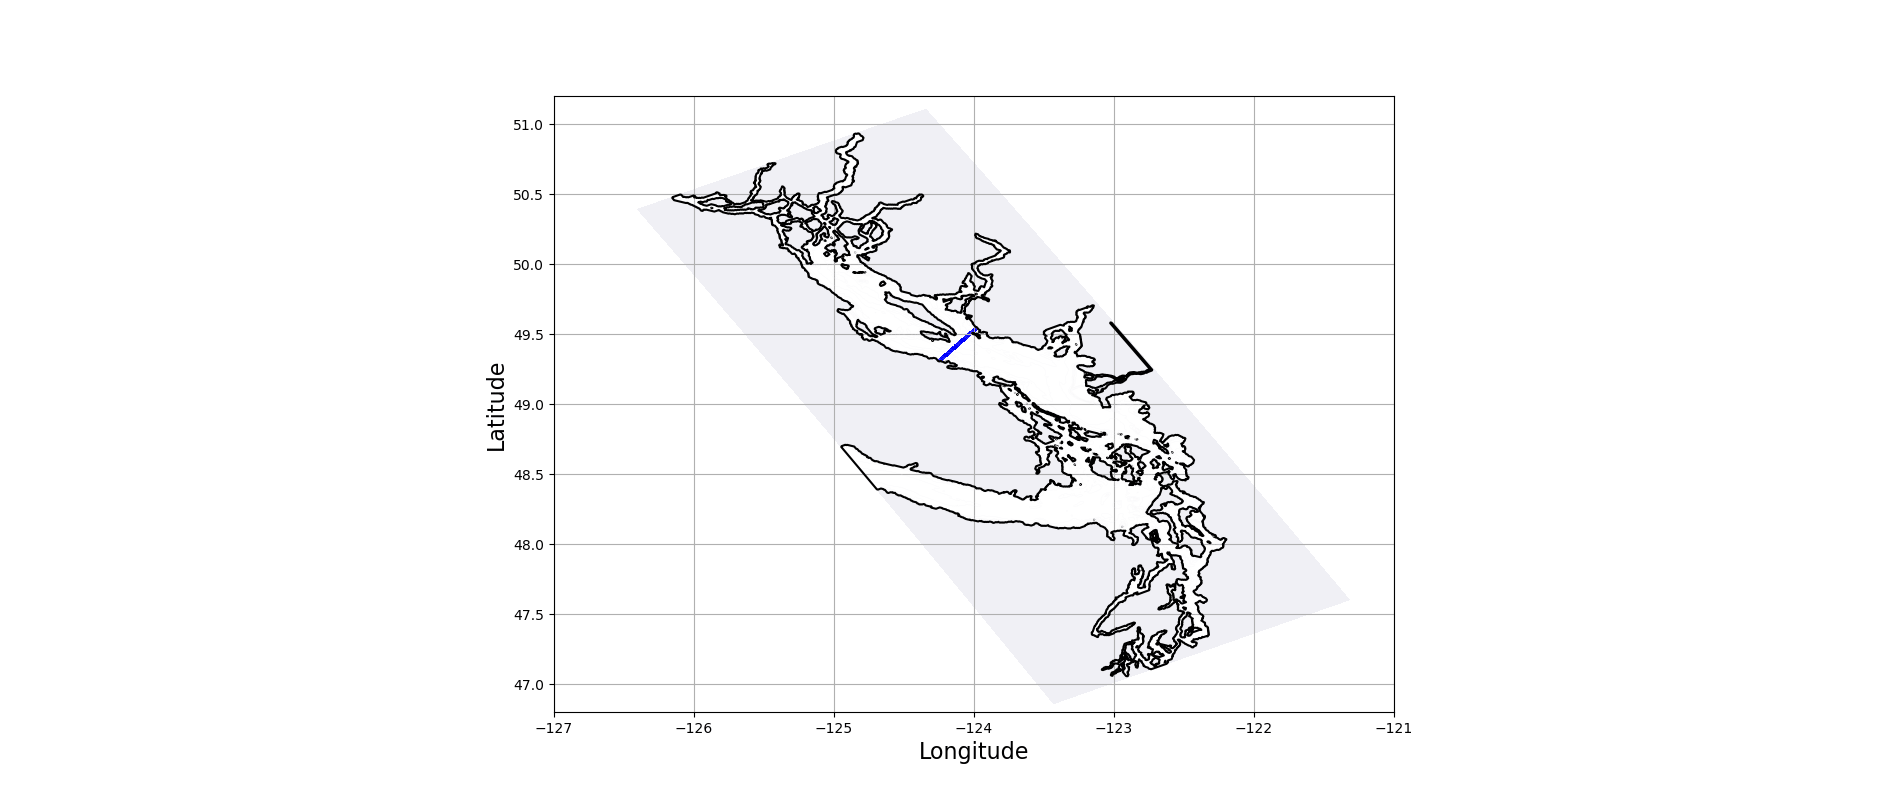

In [ ]:
with open(f,'rb') as anim:
     display(Image(anim.read()))